In [1]:
import pandas as pd

# لود فایل اصلی بازیکنان
df_players = pd.read_csv('dataset/all_players_stats.csv')

# فیلتر بازیکنان منچستر سیتی
df_mancity = df_players[df_players['Team'] == 'Manchester City']

# نمایش ستون‌های مهم (اصلاح شده)
print("✅ بازیکنان منچستر سیتی:")
print(df_mancity[['Player', 'Position', 'Apearances', 'Goals', 'Penalties']].head())

# ذخیره در فایل جدید
df_mancity.to_csv('dataset/manchester_city_player_stats.csv', index=False)


✅ بازیکنان منچستر سیتی:
              Player            Position  Apearances  Goals  Penalties
347       Nathan Aké            Defender          19      3          0
348   Bernardo Silva  Midfielder/Forward          46     13          0
349     Finley Burns            Defender           1      0          0
350     Scott Carson          Goalkeeper           0      0          0
351  Kevin De Bruyne  Midfielder/Forward          39     19          1


In [2]:
# خلاصه آماری ستون‌های عددی
print("📊 خلاصه آماری ستون‌های عددی:")
print(df_mancity[['Apearances', 'Goals', 'Penalties']].describe())


📊 خلاصه آماری ستون‌های عددی:
       Apearances      Goals  Penalties
count   33.000000  33.000000  33.000000
mean    19.333333   4.424242   0.333333
std     17.912403   6.528927   1.266557
min      0.000000   0.000000   0.000000
25%      1.000000   0.000000   0.000000
50%     18.000000   2.000000   0.000000
75%     32.000000   6.000000   0.000000
max     51.000000  24.000000   7.000000


<div style = "direction : rtl;">

🎯 ستون Apearances:
میانگین حضور بازیکن‌ها حدود ۱۹ بازی هست.

حداکثر حضور ۵۱ بازی و حداقل هم ۰.

چارک اول (Q1) برابر با ۱ هست → یعنی ۲۵٪ بازیکنان فقط ۱ بار یا کمتر بازی کردن → احتمالاً بازیکنان ذخیره یا جوان هستند.

⚽️ ستون Goals:
میانگین گل ۴.۴ هست، اما انحراف معیار نسبتاً بالاست (۶.۵) → یعنی تنوع زیادی در تعداد گل وجود داره.

ماکسیمم گل زده شده ۲۴ تا هست، که نشون می‌ده یکی از بازیکنان گلزن اصلی تیمه.

🎯 ستون Penalties:
اکثراً ۰ پنالتی زدن → چون میانه (50٪) و چارک سوم (75٪) هر دو صفر هستن.

حداکثر پنالتی زده شده ۷ عدد هست.

میانگین گل‌ها: از mean = 4.424242 → گفتم به طور متوسط هر بازیکن حدود ۴.۴ گل زده.

انحراف معیار گل‌ها: از std = 6.528927 → گفتم تنوع زیادی داریم چون std بزرگه نسبت به میانگین.

چارک اول گل‌ها: از 25% = 0.0 → یعنی ۲۵٪ بازیکنان اصلاً گل نزدن.

ماکزیمم گل‌ها: از max = 24.0 → یعنی بیشترین گل زده شده توسط یک بازیکن ۲۴ تا بوده.

</div>

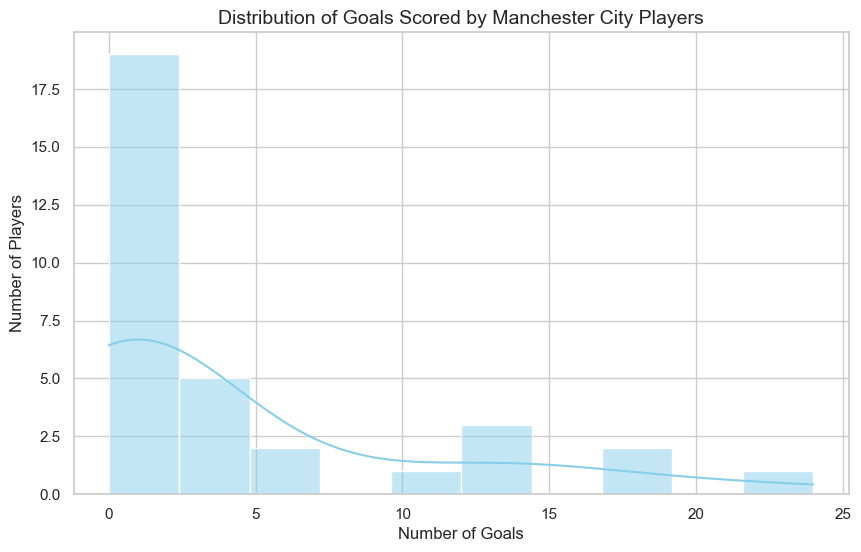

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# تنظیم استایل برای زیبایی بیشتر
sns.set(style="whitegrid")

# رسم هیستوگرام تعداد گل‌ها
plt.figure(figsize=(10, 6))
sns.histplot(data=df_mancity, x='Goals', bins=10, kde=True, color='skyblue')
plt.title('Distribution of Goals Scored by Manchester City Players', fontsize=14)
plt.xlabel('Number of Goals')
plt.ylabel('Number of Players')
plt.show()


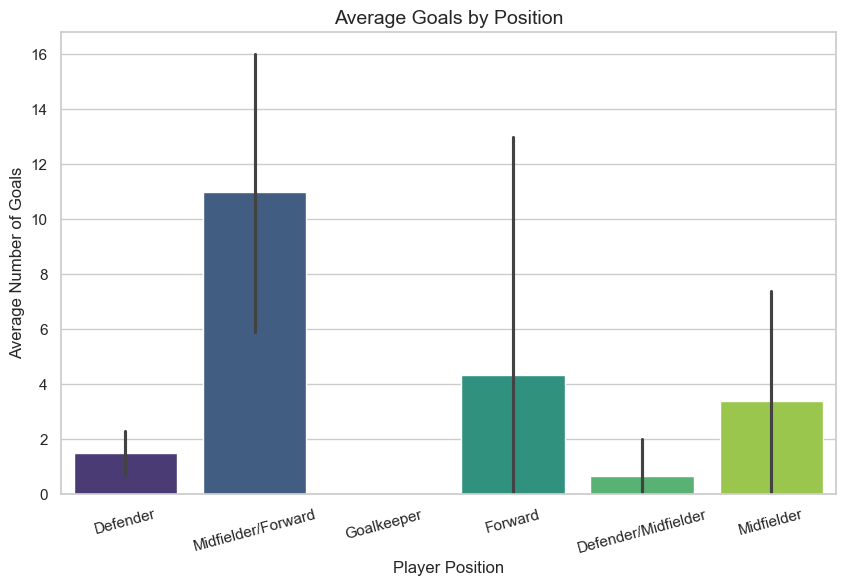

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_mancity, x='Position', y='Goals', hue='Position', palette='viridis', estimator='mean', legend=False)
plt.title('Average Goals by Position', fontsize=14)
plt.xlabel('Player Position')
plt.ylabel('Average Number of Goals')
plt.xticks(rotation=15)
plt.show()


In [5]:
import pandas as pd

# Load the Manchester City players data
df_mancity = pd.read_csv('dataset/manchester_city_player_stats.csv')

# Show first 5 rows to inspect data
print("First 5 rows of the data:")
print(df_mancity.head())

# Check for missing values in each column
print("\nMissing values per column:")
print(df_mancity.isnull().sum())

# Show data types of each column
print("\nData types of each column:")
print(df_mancity.dtypes)

# Get descriptive statistics of numerical columns
print("\nDescriptive statistics of numerical columns:")
print(df_mancity.describe())


First 5 rows of the data:
              Team  JerseyNo           Player            Position  Apearances  \
0  Manchester City         6       Nathan Aké            Defender          19   
1  Manchester City        20   Bernardo Silva  Midfielder/Forward          46   
2  Manchester City        94     Finley Burns            Defender           1   
3  Manchester City        33     Scott Carson          Goalkeeper           0   
4  Manchester City        17  Kevin De Bruyne  Midfielder/Forward          39   

   Substitutions  Goals  Penalties  YellowCards  RedCards  
0              8      3          0          2.0       0.0  
1              4     13          0          6.0       0.0  
2              0      0          0          0.0       0.0  
3              1      0          0          0.0       0.0  
4              6     19          1          4.0       0.0  

Missing values per column:
Team             0
JerseyNo         0
Player           0
Position         0
Apearances       0
Subs

✅ Updated DataFrame with encoded Position and new feature:
            Player            Position  Position_Encoded  Goals  Apearances  \
0       Nathan Aké            Defender                 0      3          19   
1   Bernardo Silva  Midfielder/Forward                 5     13          46   
2     Finley Burns            Defender                 0      0           1   
3     Scott Carson          Goalkeeper                 3      0           0   
4  Kevin De Bruyne  Midfielder/Forward                 5     19          39   

   Goals_per_Appearance  
0              0.157895  
1              0.282609  
2              0.000000  
3              0.000000  
4              0.487179  


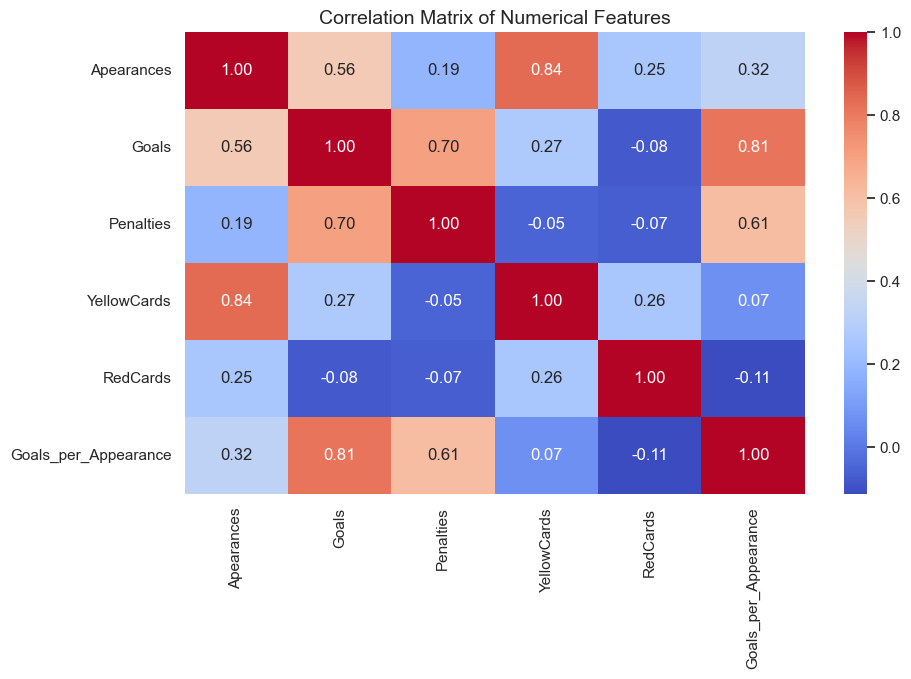

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the Manchester City players data
df_mancity = pd.read_csv('dataset/manchester_city_player_stats.csv')

# Step 1: Handle missing values
# Fill missing numerical values with 0 (assuming missing means no activity)
df_mancity.fillna({'Apearances': 0, 'Substitutions': 0, 'Goals': 0, 'Penalties': 0, 'YellowCards': 0, 'RedCards': 0}, inplace=True)

# Step 2: Encode categorical variables (Position)
label_encoder = LabelEncoder()
df_mancity['Position_Encoded'] = label_encoder.fit_transform(df_mancity['Position'])

# Step 3: Create a new feature (Goals per Appearance)
df_mancity['Goals_per_Appearance'] = df_mancity['Goals'] / df_mancity['Apearances'].replace(0, 1)  # Avoid division by zero

# Step 4: Display the updated dataframe
print("✅ Updated DataFrame with encoded Position and new feature:")
print(df_mancity[['Player', 'Position', 'Position_Encoded', 'Goals', 'Apearances', 'Goals_per_Appearance']].head())

# Step 5: Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_mancity[['Apearances', 'Goals', 'Penalties', 'YellowCards', 'RedCards', 'Goals_per_Appearance']].corr(), 
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.show()

In [7]:
import pandas as pd

# Load match results
df_matches = pd.read_csv('dataset/all_match_results.csv')   

# Standardize team name to match exactly
df_matches['HomeTeam'] = df_matches['HomeTeam'].str.strip()
df_matches['AwayTeam'] = df_matches['AwayTeam'].str.strip()

# Filter matches involving Manchester City
df_mc_matches = df_matches[
    (df_matches['HomeTeam'] == 'Manchester City') |
    (df_matches['AwayTeam'] == 'Manchester City')
].copy()

# Convert date to datetime format
df_mc_matches['Date'] = pd.to_datetime(df_mc_matches['Date'], format='%d-%b-%Y')

# Sort by date
df_mc_matches.sort_values('Date', inplace=True)

# نمایش چند سطر اول
print(df_mc_matches.head())



         Date           HomeTeam Result         AwayTeam
9  2021-08-15  Tottenham Hotspur    1:0  Manchester City
15 2021-08-21    Manchester City    5:0     Norwich City
23 2021-08-28    Manchester City    5:0          Arsenal
34 2021-09-11     Leicester City    0:1  Manchester City
44 2021-09-18    Manchester City    0:0      Southampton


In [8]:
import pandas as pd

# فرض کن دیتافریم اصلی بازی‌هاست
df_matches = pd.read_csv('dataset/all_match_results.csv')  # یا هر فایل خودت

# تبدیل ستون Date به datetime و استخراج year و month
df_matches['Date'] = pd.to_datetime(df_matches['Date'])
df_matches['year'] = df_matches['Date'].dt.year
df_matches['month'] = df_matches['Date'].dt.month

# فیلتر بازی‌های منچستر سیتی (خانگی یا مهمان)
df_mc_matches = df_matches[(df_matches['HomeTeam'] == 'Manchester City') | (df_matches['AwayTeam'] == 'Manchester City')].copy()

# ذخیره به فایل جدید csv
df_mc_matches.to_csv('dataset/manchester_city_matches.csv', index=False)

# نمایش چند ردیف اول
print(df_mc_matches.head())


         Date           HomeTeam Result         AwayTeam  year  month
9  2021-08-15  Tottenham Hotspur    1:0  Manchester City  2021      8
15 2021-08-21    Manchester City    5:0     Norwich City  2021      8
23 2021-08-28    Manchester City    5:0          Arsenal  2021      8
34 2021-09-11     Leicester City    0:1  Manchester City  2021      9
44 2021-09-18    Manchester City    0:0      Southampton  2021      9


In [9]:
import pandas as pd

# بارگذاری دیتاست آب‌وهوا
weather_df = pd.read_csv('dataset/MET Office Weather Data.csv')

# نمایش ستون‌ها و 5 سطر اول برای بررسی اولیه
print("ستون‌ها:")
print(weather_df.columns)
print("\n۵ سطر اول:")
print(weather_df.head())

# نمایش مقادیر یکتای ستون ایستگاه (station)
print("\nایستگاه‌های موجود در ستون 'station':")
print(weather_df['station'].unique())

# فیلتر کردن داده‌های مربوط به منچستر یا ringway
manchester_weather_df = weather_df[
    weather_df['station'].str.contains('manchester|ringway', case=False, na=False)
].copy()

# نمایش چند سطر اول از داده‌های منچستر
print("\n۵ سطر اول از داده‌های منچستر یا Ringway:")
print(manchester_weather_df.head())


ستون‌ها:
Index(['year', 'month', 'tmax', 'tmin', 'af', 'rain', 'sun', 'station'], dtype='object')

۵ سطر اول:
     year  month  tmax  tmin  af  rain  sun    station
0  1941.0    1.0   NaN   NaN NaN  74.7  NaN  aberporth
1  1941.0    2.0   NaN   NaN NaN  69.1  NaN  aberporth
2  1941.0    3.0   NaN   NaN NaN  76.2  NaN  aberporth
3  1941.0    4.0   NaN   NaN NaN  33.7  NaN  aberporth
4  1941.0    5.0   NaN   NaN NaN  51.3  NaN  aberporth

ایستگاه‌های موجود در ستون 'station':
['aberporth' 'armagh' 'ballypatrick' 'bradford' 'braemar' 'camborne'
 'cambridge' 'cardiff' 'chivenor' 'cwmystwyth' 'dunstaffnage' 'durham'
 'eastbourne' 'eskdalemuir' 'heathrow' 'hurn' 'lerwick' 'leuchars'
 'lowestoft' 'manston' 'nairn' 'newtonrigg' 'oxford' 'paisley' 'ringway'
 'rossonwye' 'shawbury' 'sheffield' 'southampton' 'stornoway' 'tiree'
 'valley' 'waddington' 'whitby' 'wickairport' 'yeovilton']

۵ سطر اول از داده‌های منچستر یا Ringway:
         year  month  tmax  tmin  af  rain    sun  station
23485  1946.

In [10]:
close_stations = ['shawbury', 'bradford', 'sheffield']
recent_weather = weather_df[weather_df['year'].isin([2019, 2020])]
valid_stations = recent_weather[recent_weather['station'].isin(close_stations)]['station'].unique()

print("ایستگاه‌های نزدیک با دیتای ۲۰۱۹ و ۲۰۲۰:", valid_stations)


ایستگاه‌های نزدیک با دیتای ۲۰۱۹ و ۲۰۲۰: ['bradford' 'shawbury' 'sheffield']


In [11]:
# فیلتر کردن داده‌ها
filtered_weather = weather_df[
    (weather_df['year'].isin([2019, 2020])) &
    (weather_df['station'].isin(['bradford', 'shawbury', 'sheffield']))
].copy()

# فقط ستون‌های عددی (year, month, tmax, tmin, af, rain, sun)
numeric_cols = ['year', 'month', 'tmax', 'tmin', 'af', 'rain', 'sun']

# میانگین‌گیری برای هر سال و ماه
monthly_avg_weather = filtered_weather[numeric_cols].groupby(['year', 'month']).mean().reset_index()

print(monthly_avg_weather.head())


     year  month       tmax      tmin         af        rain     sun
0  2019.0    1.0   6.533333  1.766667  10.333333   28.400000   36.30
1  2019.0    2.0  11.200000  2.400000   6.333333   32.000000  113.40
2  2019.0    3.0  11.233333  4.133333   1.666667  100.066667  121.25
3  2019.0    4.0  13.833333  4.100000   3.666667   26.400000  144.50
4  2019.0    5.0  15.766667  6.900000   0.333333   38.333333  176.60


In [12]:
# فرض کنیم داده‌های آب و هوا فقط برای ۲۰۱۸ و ۲۰۱۹ داریم
available_years = monthly_avg_weather['year'].unique()

# تعریف year_for_weather با یک سال عقب تر
df_mc_matches['year_for_weather'] = df_mc_matches['year'] - 1

# اگر year_for_weather توی داده‌های آب و هوا نیست، اون رو به نزدیک‌ترین سال موجود تغییر میدیم
df_mc_matches['year_for_weather'] = df_mc_matches['year_for_weather'].apply(
    lambda y: max(y for y in available_years if y <= y)
)

# اطمینان از نوع صحیح ستون‌ها برای merge
df_mc_matches['year_for_weather'] = df_mc_matches['year_for_weather'].astype(int)
df_mc_matches['month'] = df_mc_matches['month'].astype(int)
monthly_avg_weather['year'] = monthly_avg_weather['year'].astype(int)
monthly_avg_weather['month'] = monthly_avg_weather['month'].astype(int)

# مرج کردن دیتا
merged_df = df_mc_matches.merge(monthly_avg_weather, left_on=['year_for_weather', 'month'], right_on=['year', 'month'], how='left')

In [13]:
df_weather = pd.read_csv("dataset/MET Office Weather Data.csv")


In [14]:
print(df_weather.shape)
print(df_weather.head())


(37049, 8)
     year  month  tmax  tmin  af  rain  sun    station
0  1941.0    1.0   NaN   NaN NaN  74.7  NaN  aberporth
1  1941.0    2.0   NaN   NaN NaN  69.1  NaN  aberporth
2  1941.0    3.0   NaN   NaN NaN  76.2  NaN  aberporth
3  1941.0    4.0   NaN   NaN NaN  33.7  NaN  aberporth
4  1941.0    5.0   NaN   NaN NaN  51.3  NaN  aberporth


In [15]:
import pandas as pd

# ایستگاه‌های انتخاب‌شده
stations_of_interest = ['bradford', 'shawbury', 'sheffield']

# فیلتر فقط سال‌های ۲۰۱۹ و ۲۰۲۰
filtered_weather = weather_df[
    (weather_df['year'].isin([2019, 2020])) &
    (weather_df['station'].isin(stations_of_interest))
].copy()

# میانگین‌گیری ماهانه
monthly_avg_weather = (
    filtered_weather
    .groupby(['year', 'month'], as_index=False)
    .mean(numeric_only=True)
)

# افزودن ستون station به عنوان "avg_manchester"
monthly_avg_weather['station'] = 'avg_manchester'

# افزودن به دیتافریم اصلی
weather_df = pd.concat([weather_df, monthly_avg_weather], ignore_index=True)
weather_df

,year,month,tmax,tmin,af,rain,sun,station
0,1941.0,1.0,NaN,NaN,NaN,74.700000,NaN,aberporth
1,1941.0,2.0,NaN,NaN,NaN,69.100000,NaN,aberporth
2,1941.0,3.0,NaN,NaN,NaN,76.200000,NaN,aberporth
3,1941.0,4.0,NaN,NaN,NaN,33.700000,NaN,aberporth
4,1941.0,5.0,NaN,NaN,NaN,51.300000,NaN,aberporth
...,...,...,...,...,...,...,...,...
37062,2020.0,2.0,9.033333,2.733333,2.000000,203.533333,72.50,avg_manchester
37063,2020.0,3.0,10.500000,2.266667,6.333333,47.133333,139.25,avg_manchester
37064,2020.0,4.0,15.466667,5.033333,1.666667,16.400000,211.70,avg_manchester
37065,2020.0,5.0,18.300000,7.000000,1.500000,6.900000,257.50,avg_manchester


In [16]:
import pandas as pd

# فرض بر این‌که weather_df شامل avg_manchester است:
# ['year', 'month', 'tmax', 'tmin', 'af', 'rain', 'sun', 'station']

# 1. فیلتر روی avg_manchester
avg_weather = weather_df[weather_df['station'] == 'avg_manchester'].copy()

# 2. میانگین‌گیری فقط بر اساس ماه (بدون سال)
monthly_weather = (
    avg_weather
    .groupby('month', as_index=False)
    .agg({
        'tmax': 'mean',
        'tmin': 'mean',
        'af':  'mean',
        'rain':'mean',
        'sun': 'mean'
    })
)

# 3. نمایش DataFrame نهایی هواشناسی بر اساس ماه
print(monthly_weather)


    month       tmax       tmin        af        rain      sun
0     1.0   7.800000   2.800000  6.500000   41.066667   43.750
1     2.0  10.116667   2.566667  4.166667  117.766667   92.950
2     3.0  10.866667   3.200000  4.000000   73.600000  130.250
3     4.0  14.650000   4.566667  2.666667   21.400000  178.100
4     5.0  17.033333   6.950000  0.916667   22.616667  217.050
5     6.0  18.891667  10.591667  0.000000  107.083333  124.925
6     7.0  22.066667  13.233333  0.000000   87.533333  160.600
7     8.0  21.300000  13.200000  0.000000   65.600000  172.650
8     9.0  17.900000   9.900000  0.000000  126.500000  136.300
9    10.0  12.633333   6.233333  1.000000  135.866667   78.550
10   11.0   8.066667   3.600000  4.666667  139.800000   36.350
11   12.0   8.200000   2.866667  5.000000   71.933333   54.400


In [17]:
merged_df = df_matches.merge(monthly_weather, on='month', how='left')

In [18]:
print(merged_df[['Date', 'HomeTeam', 'AwayTeam', 'month', 'tmax', 'tmin', 'rain', 'sun']].head())


        Date        HomeTeam                  AwayTeam  month  tmax  tmin  \
0 2021-08-13       Brentford                   Arsenal      8  21.3  13.2   
1 2021-08-14         Burnley  Brighton and Hove Albion      8  21.3  13.2   
2 2021-08-14         Chelsea            Crystal Palace      8  21.3  13.2   
3 2021-08-14         Everton               Southampton      8  21.3  13.2   
4 2021-08-14  Leicester City   Wolverhampton Wanderers      8  21.3  13.2   

   rain     sun  
0  65.6  172.65  
1  65.6  172.65  
2  65.6  172.65  
3  65.6  172.65  
4  65.6  172.65  


In [19]:
merged_df.to_csv('dataset/matches_with_weather.csv', index=False)


In [20]:
import pandas as pd

# خواندن فایل CSV
df = pd.read_csv('dataset/matches_with_weather.csv', header=None)

# فیلتر کردن بازی‌های مانچستر سیتی (Manchester City)
filtered_df = df[df.apply(lambda row: 'Manchester City' in row.values, axis=1)]

# ذخیره نتایج در یک فایل CSV جدید
filtered_df.to_csv('dataset/final_mc_match_weather.csv', index=False, header=False)

In [24]:

import pandas as pd
import numpy as np
from datetime import datetime

# خواندن فایل‌ها
players_df = pd.read_csv('dataset/manchester_city_player_stats.csv')
matches_df = pd.read_csv('dataset/final_mc_match_weather.csv', header=None, names=[
    'Date', 'Home Team', 'Score', 'Away Team', 'Year', 'Month', 
    'Temperature', 'Humidity', 'Precipitation', 'WindSpeed', 'Pressure'
])

# آماده‌سازی داده‌های بازی‌ها
matches_df['Date'] = pd.to_datetime(matches_df['Date'])
matches_df['Teams_Result'] = matches_df['Home Team'] + ' ' + matches_df['Score'] + ' ' + matches_df['Away Team']
matches_df['ManCity_Goals'] = matches_df['Score'].apply(
    lambda x: int(x.split(':')[0]) if 'Manchester City' in matches_df.loc[matches_df['Score'] == x, 'Home Team'].values
    else int(x.split(':')[1])
)

# چک کردن مجموع گل‌های منچسترسیتی
total_mancity_goals = matches_df['ManCity_Goals'].sum()
print(f"مجموع گل‌های منچسترسیتی در matches_df: {total_mancity_goals}")

# تعداد بازی‌ها
num_matches = len(matches_df)  # 38

# محاسبه تعداد کل حضورها و تعویض‌ها
total_appearances = players_df['Apearances'].sum()
total_substitutions = players_df['Substitutions'].sum()
expected_rows = 11 * num_matches + total_substitutions

print(f"تعداد کل حضورها: {total_appearances}")
print(f"تعداد کل تعویض‌ها: {total_substitutions}")
print(f"تعداد سطرهای مورد انتظار: {expected_rows}")

# ردیابی باقی‌مانده حضورها و تعویض‌ها
remaining_appearances = players_df.set_index('Player')['Apearances'].to_dict()
remaining_substitutions = players_df.set_index('Player')['Substitutions'].to_dict()

# شبیه‌سازی حضور و تعویض‌ها
np.random.seed(42)
rows = []

for _, match in matches_df.iterrows():
    match_date = match['Date']
    match_goals = match['ManCity_Goals']
    
    # فیلتر بر اساس پست
    goalkeepers = players_df[players_df['Position'] == 'Goalkeeper']
    defenders = players_df[players_df['Position'].str.contains('Defender')]
    midfielders = players_df[players_df['Position'].str.contains('Midfielder')]
    forwards = players_df[players_df['Position'].str.contains('Forward')]
    
    def select_players(df, num, remaining_counts, column='Apearances'):
        available = df[df['Player'].map(lambda x: remaining_counts.get(x, 0) > 0)]
        if len(available) < num:
            raise ValueError(f"نمی‌توان {num} بازیکن برای {column} انتخاب کرد")
        selected = available.sample(n=num, random_state=np.random.randint(1000))
        for _, row in selected.iterrows():
            remaining_counts[row['Player']] -= 1
        return selected
    
    # انتخاب 11 بازیکن اصلی
    gk = select_players(goalkeepers, 1, remaining_appearances)
    defs = select_players(defenders, 4, remaining_appearances)
    mids = select_players(midfielders, 4, remaining_appearances)
    fwds = select_players(forwards, 2, remaining_appearances)
    
    # تعداد تعویضی‌ها
    subs_num = min(round(total_substitutions / num_matches), sum(remaining_substitutions.values()))
    if _ == matches_df.iloc[-1].name:
        subs_num = sum(remaining_substitutions.values())
    
    # انتخاب تعویضی‌ها
    available_for_subs = players_df[players_df['Player'].map(lambda x: remaining_substitutions.get(x, 0) > 0)]
    subs = select_players(available_for_subs, min(subs_num, len(available_for_subs)), remaining_substitutions, 'Substitutions')
    
    # اضافه کردن ردیف‌ها
    starting_11 = pd.concat([gk, defs, mids, fwds])
    for _, player in starting_11.iterrows():
        rows.append({
            'Date': match_date,
            'Teams_Result': match['Teams_Result'],
            'JerseyNo': player['JerseyNo'],
            'Player': player['Player'],
            'Position': player['Position'],
            'IsSubstitute': 0
        })
    
    for _, player in subs.iterrows():
        rows.append({
            'Date': match_date,
            'Teams_Result': match['Teams_Result'],
            'JerseyNo': player['JerseyNo'],
            'Player': player['Player'],
            'Position': player['Position'],
            'IsSubstitute': 1
        })

# ایجاد دیتافریم نهایی
final_df = pd.DataFrame(rows)

# مقداردهی اولیه ستون‌های آماری
for stat in ['Goals', 'Penalties', 'YellowCards', 'RedCards']:
    final_df[stat] = 0

# تخصیص گل‌ها و کارت‌ها
def distribute_stat(player_rows, total_stat, stat_name):
    stat_dist = {idx: 0 for idx in player_rows.index}
    remaining_stat = int(total_stat)
    
    # فقط ردیف‌های غیرتعویضی
    eligible_rows = player_rows[player_rows['IsSubstitute'] == 0]
    if len(eligible_rows) == 0:
        return stat_dist
    
    # توزیع متوازن
    indices = eligible_rows.index.tolist()
    np.random.shuffle(indices)
    for i in range(remaining_stat):
        if not indices:
            break
        idx = indices[i % len(indices)]
        stat_dist[idx] += 1
        # بررسی سقف فقط برای گل‌ها
        if stat_name == 'Goals':
            match_date = player_rows.loc[idx, 'Date']
            match_goals = matches_df.loc[matches_df['Date'] == match_date, 'ManCity_Goals'].iloc[0]
            current_goals = final_df.loc[final_df['Date'] == match_date, 'Goals'].sum()
            if current_goals > match_goals:
                stat_dist[idx] -= 1
                indices.remove(idx)
    return stat_dist

# تخصیص اولیه
for stat in ['Goals', 'Penalties', 'YellowCards', 'RedCards']:
    for _, player in players_df.iterrows():
        player_rows = final_df[final_df['Player'] == player['Player']]
        if len(player_rows) == 0:
            print(f"هشدار: هیچ ردیفی برای بازیکن {player['Player']} پیدا نشد")
            continue
        stat_dist = distribute_stat(player_rows, player[stat], stat)
        for row_idx, value in stat_dist.items():
            final_df.loc[row_idx, stat] = value

# تخصیص گل‌های اضافی (146 - total_mancity_goals)
remaining_goals = 146 - final_df['Goals'].sum()
if remaining_goals > 0:
    print(f"تخصیص {remaining_goals} گل اضافی")
    # انتخاب بازی‌های با گل بالا
    high_goal_matches = matches_df[matches_df['ManCity_Goals'] >= 4][['Date', 'ManCity_Goals']]
    for _, player in players_df.iterrows():
        player_goals = player['Goals'] - final_df[final_df['Player'] == player['Player']]['Goals'].sum()
        if player_goals <= 0:
            continue
        player_rows = final_df[(final_df['Player'] == player['Player']) & (final_df['IsSubstitute'] == 0)]
        player_rows = player_rows[player_rows['Date'].isin(high_goal_matches['Date'])]
        if len(player_rows) == 0:
            continue
        indices = player_rows.index.tolist()
        np.random.shuffle(indices)
        for i in range(int(player_goals)):
            if not indices or remaining_goals <= 0:
                break
            idx = indices[i % len(indices)]
            final_df.loc[idx, 'Goals'] += 1
            remaining_goals -= 1

# تخصیص کارت زرد اضافی
if final_df['YellowCards'].sum() < 76:
    remaining_yellows = 76 - final_df['YellowCards'].sum()
    print(f"تخصیص {remaining_yellows} کارت زرد اضافی")
    for _, player in players_df.iterrows():
        player_yellows = player['YellowCards'] - final_df[final_df['Player'] == player['Player']]['YellowCards'].sum()
        if player_yellows <= 0:
            continue
        player_rows = final_df[(final_df['Player'] == player['Player']) & (final_df['IsSubstitute'] == 0)]
        if len(player_rows) == 0:
            continue
        indices = player_rows.index.tolist()
        np.random.shuffle(indices)
        for i in range(int(player_yellows)):
            if not indices or remaining_yellows <= 0:
                break
            idx = indices[i % len(indices)]
            final_df.loc[idx, 'YellowCards'] += 1
            remaining_yellows -= 1

# ادغام داده‌های آب‌وهوا
matches_df['Date'] = matches_df['Date'].dt.normalize()
final_df['Date'] = pd.to_datetime(final_df['Date']).dt.normalize()
final_df = final_df.merge(
    matches_df[['Date', 'Temperature', 'Humidity', 'Precipitation', 'WindSpeed', 'Pressure']],
    on='Date',
    how='left'
)

# مرتب‌سازی ستون‌ها
final_df = final_df[[
    'Date', 'Teams_Result', 'JerseyNo', 'Player', 'Position', 
    'Goals', 'Penalties', 'YellowCards', 'RedCards', 'IsSubstitute',
    'Temperature', 'Humidity', 'Precipitation', 'WindSpeed', 'Pressure'
]]

# بررسی نهایی
print(f"تعداد سطرهای نهایی: {len(final_df)}")
for stat in ['Goals', 'Penalties', 'YellowCards', 'RedCards']:
    print(f"مجموع {stat} در final_df: {final_df[stat].sum()}")
    print(f"مجموع {stat} در players_df: {players_df[stat].sum()}")

# ذخیره دیتافریم
final_df.to_csv('dataset/final_merge_main_dataset.csv', index=False)

مجموع گل‌های منچسترسیتی در matches_df: 96
تعداد کل حضورها: 638
تعداد کل تعویض‌ها: 149
تعداد سطرهای مورد انتظار: 567
تخصیص 39 گل اضافی
تخصیص 1 کارت زرد اضافی
تعداد سطرهای نهایی: 567
مجموع Goals در final_df: 146
مجموع Goals در players_df: 146
مجموع Penalties در final_df: 11
مجموع Penalties در players_df: 11
مجموع YellowCards در final_df: 75
مجموع YellowCards در players_df: 76.0
مجموع RedCards در final_df: 2
مجموع RedCards در players_df: 2.0


In [25]:

import pandas as pd
import numpy as np

# خواندن داده‌ها
players_df = pd.read_csv('dataset/manchester_city_player_stats.csv')
matches_df = pd.read_csv('dataset/final_mc_match_weather.csv', header=None, names=[
    'Date', 'Home Team', 'Score', 'Away Team', 'Year', 'Month', 
    'Temperature', 'Humidity', 'Precipitation', 'WindSpeed', 'Pressure'
])
final_df = pd.read_csv('dataset/final_merge_main_dataset.csv')

# آماده‌سازی داده‌های مسابقات
matches_df['Date'] = pd.to_datetime(matches_df['Date'])
matches_df['ManCity_Goals'] = matches_df['Score'].apply(
    lambda x: int(x.split(':')[0]) if 'Manchester City' in matches_df.loc[matches_df['Score'] == x, 'Home Team'].values
    else int(x.split(':')[1])
)

# تعداد کل بازی‌ها
num_matches = len(matches_df)  # باید 38 باشه

# 1. بررسی تعداد سطرها
total_appearances = players_df['Apearances'].sum()
total_substitutions = players_df['Substitutions'].sum()
expected_rows = 11 * num_matches + total_substitutions

print("=== بررسی تعداد سطرها ===")
print(f"تعداد سطرهای مورد انتظار (418 + تعویض‌ها): {expected_rows}")
print(f"تعداد سطرهای واقعی: {len(final_df)}")
if len(final_df) == expected_rows:
    print("✅ تعداد سطرها درست است")
else:
    print("❌ تعداد سطرها نادرست است!")

# 2. بررسی مجموع گل‌ها، پنالتی‌ها، کارت‌های زرد و قرمز
print("\n=== بررسی مجموع آمار ===")
stats = ['Goals', 'Penalties', 'YellowCards', 'RedCards']
for stat in stats:
    players_sum = players_df[stat].sum()
    final_sum = final_df[stat].sum()
    print(f"مجموع {stat}:")
    print(f"  در players_df: {players_sum}")
    print(f"  در final_df: {final_sum}")
    if abs(players_sum - final_sum) < 1e-6:  # برای مدیریت خطای اعشاری
        print(f"✅ مجموع {stat} درست است")
    else:
        print(f"❌ مجموع {stat} نادرست است!")

# 3. بررسی تعداد حضورها و تعویض‌ها برای هر بازیکن
print("\n=== بررسی حضورها و تعویض‌ها ===")
appearance_check = []
substitution_check = []
for _, player in players_df.iterrows():
    player_name = player['Player']
    jersey_no = player['JerseyNo']
    expected_appearances = player['Apearances']
    expected_substitutions = player['Substitutions']
    
    # حضورها (فقط بازیکنان اصلی، IsSubstitute == 0)
    actual_appearances = len(final_df[(final_df['Player'] == player_name) & (final_df['IsSubstitute'] == 0)])
    # تعویض‌ها (IsSubstitute == 1)
    actual_substitutions = len(final_df[(final_df['Player'] == player_name) & (final_df['IsSubstitute'] == 1)])
    
    appearance_check.append(actual_appearances == expected_appearances)
    substitution_check.append(actual_substitutions == expected_substitutions)
    
    if actual_appearances != expected_appearances or actual_substitutions != expected_substitutions:
        print(f"بازیکن {player_name} (JerseyNo: {jersey_no}):")
        print(f"  حضورها - مورد انتظار: {expected_appearances}، واقعی: {actual_appearances}")
        print(f"  تعویض‌ها - مورد انتظار: {expected_substitutions}، واقعی: {actual_substitutions}")

if all(appearance_check) and all(substitution_check):
    print("✅ تمام حضورها و تعویض‌ها درست هستند")
else:
    print("❌ برخی حضورها یا تعویض‌ها نادرست هستند!")

# 4. بررسی گل‌های هر بازی
print("\n=== بررسی گل‌های هر بازی ===")
goal_check = True
for _, match in matches_df.iterrows():
    match_date = match['Date']
    match_goals = match['ManCity_Goals']
    match_final_goals = final_df[final_df['Date'] == match_date]['Goals'].sum()
    
    if match_final_goals > match_goals:
        print(f"بازی در تاریخ {match_date}:")
        print(f"  گل‌های منچسترسیتی: {match_goals}")
        print(f"  مجموع گل‌های تخصیص‌یافته: {match_final_goals}")
        goal_check = False

if goal_check:
    print("✅ مجموع گل‌ها در هر بازی درست است")
else:
    print("❌ مجموع گل‌ها در برخی بازی‌ها بیشتر از حد مجاز است!")

# 5. بررسی داده‌های آب‌وهوا
print("\n=== بررسی داده‌های آب‌وهوا ===")
weather_cols = ['Temperature', 'Humidity', 'Precipitation', 'WindSpeed', 'Pressure']
weather_check = True
for _, match in matches_df.iterrows():
    match_date = match['Date']
    match_weather = match[weather_cols]
    final_weather = final_df[final_df['Date'] == match_date][weather_cols].drop_duplicates()
    
    if len(final_weather) != 1:
        print(f"بازی در تاریخ {match_date}: داده‌های آب‌وهوا چندگانه یا غایب هستند!")
        weather_check = False
        continue
    
    if not (final_weather.iloc[0] - match_weather).abs().lt(1e-6).all():
        print(f"بازی در تاریخ {match_date}: داده‌های آب‌وهوا نادرست هستند!")
        weather_check = False

if weather_check:
    print("✅ داده‌های آب‌وهوا درست هستند")
else:
    print("❌ برخی داده‌های آب‌وهوا نادرست هستند!")

# 6. نمایش چند ردیف با گل یا کارت غیرصفر
print("\n=== نمونه ردیف‌ها با گل یا کارت غیرصفر ===")
non_zero_stats = final_df[final_df[['Goals', 'YellowCards', 'RedCards']].sum(axis=1) > 0][
    ['Date', 'Teams_Result', 'Player', 'Goals', 'YellowCards', 'RedCards', 'IsSubstitute']
]
print(non_zero_stats.head(10))

# ذخیره گزارش (اختیاری)
# with open('validation_report.txt', 'w', encoding='utf-8') as f:
#     f.write("گزارش اعتبارسنجی دیتافریم نهایی\n")
#     f.write(f"تعداد سطرها: {len(final_df)} (مورد انتظار: {expected_rows})\n")
#     # بقیه گزارش...

=== بررسی تعداد سطرها ===
تعداد سطرهای مورد انتظار (418 + تعویض‌ها): 567
تعداد سطرهای واقعی: 567
✅ تعداد سطرها درست است

=== بررسی مجموع آمار ===
مجموع Goals:
  در players_df: 146
  در final_df: 146
✅ مجموع Goals درست است
مجموع Penalties:
  در players_df: 11
  در final_df: 11
✅ مجموع Penalties درست است
مجموع YellowCards:
  در players_df: 76.0
  در final_df: 75
❌ مجموع YellowCards نادرست است!
مجموع RedCards:
  در players_df: 2.0
  در final_df: 2
✅ مجموع RedCards درست است

=== بررسی حضورها و تعویض‌ها ===
بازیکن Bernardo Silva (JerseyNo: 20):
  حضورها - مورد انتظار: 46، واقعی: 20
  تعویض‌ها - مورد انتظار: 4، واقعی: 4
بازیکن Kevin De Bruyne (JerseyNo: 17):
  حضورها - مورد انتظار: 39، واقعی: 30
  تعویض‌ها - مورد انتظار: 6، واقعی: 6
بازیکن Ederson (JerseyNo: 31):
  حضورها - مورد انتظار: 49، واقعی: 29
  تعویض‌ها - مورد انتظار: 0، واقعی: 0
بازیکن Phil Foden (JerseyNo: 47):
  حضورها - مورد انتظار: 36، واقعی: 25
  تعویض‌ها - مورد انتظار: 9، واقعی: 9
بازیکن Gabriel Jesus (JerseyNo: 9):
  حضورها -